# <center> Proyecto Final
# <center> Métodos de DL para  Análisis de Tractografía Mediante Datos de dMRI.
<center> Institution: Centro de Investigación en Matemáticas A.C. 
<center> Gabriel Alejandro Aguilar Farrera  
<center> David Alejandro Muro Campa
<center> Course: Tópicos Selectos de Ciencia de Datos (Deep Learning)
    

# Quantitative tractography

En este pequeño tutorial presentamos como obtener los picos (peks.nii.gz) de una Imágen de Resonancia Magnética Pesada por Difusión. Así mismo mostramos algunas visualizaciones interesantes. Asumimos que tienen [MRtrix](https://www.mrtrix.org) instalado en su sistema.

In [6]:
import os                             # Trabajar con rutas de archivos
import numpy as np                    # Operaciones con arreglos
import nibabel as nib                 # leer y escribir archivos NIfTI
import matplotlib.pyplot as plt       # Gráficos
# from nibabel.testing import data_path 
import sys
import bct                            # Brain Connectivity Toolbox

# Step 1: 
### Agregar las herramientas disponibles de MRtrix al PATH actual.

In [7]:
# Establecer la variable de entorno HOME
os.environ['HOME'] = 'D:\\gabri'

# Ruta que deseas agregar al PATH
nueva_ruta = r'C:\msys64\mingw64\bin'

# Obtén el valor actual del PATH
path_actual = os.environ["PATH"]

# Agrega la nueva ruta al PATH si no está ya presente
if nueva_ruta not in path_actual:
    os.environ["PATH"] = nueva_ruta + os.pathsep + path_actual

print("Ruta agregada al PATH:", nueva_ruta)

Ruta agregada al PATH: C:\msys64\mingw64\bin


# Step 2:
### Carga y visualización de la DWI disponible

In [25]:
! mrinfo fMONCHO_DWI_SEN_8B0_4x32_B2000_4x32_b2500.nii

************************************************
Image name:          "fMONCHO_DWI_SEN_8B0_4x32_B2000_4x32_b2500.nii"
************************************************
  Dimensions:        128 x 128 x 60 x 264
  Voxel size:        2 x 2 x 2 x ?
  Data strides:      [ -1 2 3 4 ]
  Format:            NIfTI-1.1
  Data type:         signed 16 bit integer (little endian)
  Intensity scaling: offset = 0, multiplier = 1.7946300506591797
  Transform:                    1           0           0      -123.9
                               -0           1           0      -109.7
                               -0           0           1      -52.63
  comments:          ?TR:11300.000 TE:
  mrtrix_version:    3.0.3


* El primer número (128) representa la cantidad de voxels en la dimensión "x".
* El segundo número (128 también) representa la cantidad de voxels en la dimensión "y".
* El tercer número (60) representa la cantidad de cortes o rebanadas en la dimensión "z" (axial, coronal o sagital).

In [27]:
! mrview fMONCHO_DWI_SEN_8B0_4x32_B2000_4x32_b2500.nii -mode 2

In [ ]:
! dwi2mask \
    fMONCHO_DWI_SEN_8B0_4x32_B2000_4x32_b2500.nii brain_mask.nii.gz -fslgrad data/DWI_scheme_mrtrix.txt -force

# visualize the estimated masks
! mrview data/DWI.nii.gz -mode 2 \
    -overlay.load brain_mask.nii.gz -overlay.intensity 0,1 -overlay.opacity 0.25 -overlay.colourmap 5 -overlay.interpolation 0 \
    -overlay.load data/wm_mask.nii.gz -overlay.intensity 0,1 -overlay.opacity 0.5 -overlay.colourmap 3 -overlay.interpolation 0

In [2]:
# Cargamos los datos de picos
Vpeaks = nib.load('peaks.nii')
PEAKS = Vpeaks.get_fdata()
dims = PEAKS.shape
print(dims)
npeaks = dims[3] // 3
# print(npeaks)

(128, 128, 60, 9)


In [3]:
PEAKS[:,:,1,1][64]

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,  0.08284372,  0.05308584,  0.00384999,
               nan,         nan, -0.00146273,  0.07145772,  0.08525702,
        0.22870399,  0.31661212, -0.02030105,  0.32575884, -0.10372668,
       -0.09511008, -0.20655794,  0.12114733,  0.05924486, -0.00276051,
       -0.25684953,  0.54514289, -0.60155058, -0.40621263, -0.10614988,
        0.07998995,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      

In [4]:
import numpy as np
# Assuming PEAKS is your NumPy array

# To find minimum value ignoring nan
min_value = np.nanmin(PEAKS[:,:,1,1])

# To find maximum value ignoring nan
max_value = np.nanmax(PEAKS[:,:,1,1])

print("Minimum value:", min_value)
print("Maximum value:", max_value)

Minimum value: -0.9220869541168213
Maximum value: 0.9851928353309631


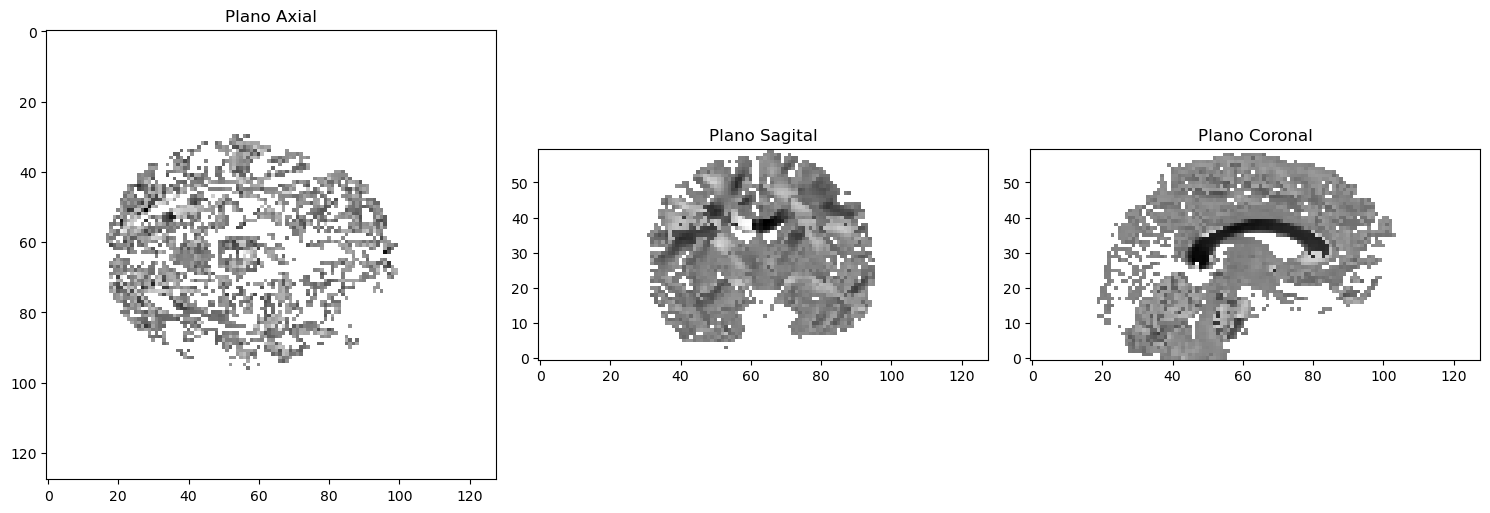

In [5]:
data1 = Vpeaks.get_fdata()  # Obtener los datos como una matriz numpy

# Visualizar cortes en diferentes planos
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plano Axial
axes[0].imshow(data1[:, :, 20, 4], cmap='gray')
axes[0].set_title('Plano Axial')

# Plano Sagital
axes[1].imshow(data1[:, 64, :, 0].T, cmap='gray', origin='lower')
axes[1].set_title('Plano Sagital')

# Plano Coronal
axes[2].imshow(data1[64, :, :, 0].T, cmap='gray', origin='lower')
axes[2].set_title('Plano Coronal')

plt.tight_layout()
plt.show()